### Introduction

Unlocking the secrets behind hotel booking patterns and guest preferences has always been a fascinating pursuit. Imagine having the ability to predict the prime window for reserving a hotel room, determining the ideal duration of stay for the most cost-effective rates, or even foreseeing the likelihood of special requests flooding in for a particular hotel. This is where the captivating world of hotel booking prediction comes into play.

Delving into the realm of this dataset, you embark on a journey to unravel the intricacies of hotel reservations. The dataset unfolds an array of insightful information, encompassing bookings made for both a city hotel and a resort hotel. Packed within are revelations about booking timelines, lengths of stay, guest demographics, family compositions, parking availability, and so much more.

Immerse yourself in the wealth of data, where every row holds a story of its own, a snapshot of guest preferences and behaviors. With personal identifiers meticulously stripped away, this dataset offers a window into the realm of hospitality analytics. Whether you're a data enthusiast, a hospitality professional, or simply curious about the factors shaping the world of hotel reservations, this dataset provides a treasure trove of opportunities to explore, analyze, and predict. So, join us in decoding the patterns that govern hotel bookings and discover the untapped insights that lie within.

<b> Data Description</b>


The dataset contains information related to hotel bookings and customer details. It includes the following attributes:

1. **hotel**: A string indicating the type of hotel, whether it's a "City Hotel" or "Resort Hotel."

2. **is_canceled**: An integer indicating whether the booking was canceled (1) or not (0).

3. **lead_time**: An integer representing the number of days between booking date and arrival date.

4. **arrival_date_year**: An integer indicating the year of the arrival date.

5. **arrival_date_month**: A string representing the month of the arrival date.

6. **arrival_date_week_number**: An integer indicating the week number of the arrival date.

7. **arrival_date_day_of_month**: An integer indicating the day of the month of the arrival date.

8. **stays_in_weekend_nights**: An integer indicating the number of weekend nights stayed.

9. **stays_in_week_nights**: An integer indicating the number of week nights stayed.

10. **adults**: An integer representing the number of adults.

11. **children**: A string representing the number of children.

12. **babies**: An integer indicating the number of babies.

13. **meal**: A string indicating the meal type.

14. **country**: A string indicating the country of origin.

15. **market_segment**: A string indicating the market segment of the booking.

16. **distribution_channel**: A string indicating the distribution channel for the booking.

17. **is_repeated_guest**: An integer indicating whether the guest is a repeated guest (1) or not (0).

18. **previous_cancellations**: A string representing the number of previous cancellations.

19. **previous_bookings_not_canceled**: A string representing the number of previous bookings not canceled.

20. **reserved_room_type**: A string indicating the reserved room type.

21. **assigned_room_type**: A string indicating the assigned room type.

22. **booking_changes**: An integer indicating the number of changes made to the booking.

23. **deposit_type**: A string indicating the deposit type.

24. **agent**: A string indicating the ID of the travel agent.

25. **company**: A string indicating the ID of the company.

26. **days_in_waiting_list**: An integer indicating the number of days the booking was in the waiting list.

27. **customer_type**: A string indicating the customer type.

28. **adr**: A string representing the average daily rate.

29. **required_car_parking_spaces**: An integer indicating the number of required car parking spaces.

30. **total_of_special_requests**: An integer indicating the total number of special requests.

31. **reservation_status**: A string indicating the reservation status.

32. **reservation_status_date**: A string indicating the date of the reservation status.


#### Installing libraries

In [ ]:
!pip install pyspark

#### importing libraries

In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import GBTClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


import random
random.seed(10)
import warnings
warnings.filterwarnings("ignore")


In [ ]:
spark = SparkSession.builder.appName("Hotel_Bookings").getOrCreate()
data_path = "hotel_bookings.csv"
hotel_df = spark.read.csv(data_path, header=True, inferSchema=True)
hotel_df.show(3)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+---+---------------------------+-------------------------+------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|adr|required_car_parking_spaces|total_of

#### Exploring data

In [ ]:
hotel_df.show()

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+------+---------------------------+-------------------------+------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|   adr|required_car_parking_spaces|to

In [ ]:
hotel_df.describe().show()

+-------+------------+-------------------+------------------+------------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------------------+-------------------+--------------------+---------+-------+--------------+--------------------+--------------------+----------------------+------------------------------+------------------+------------------+-------------------+------------+------------------+------------------+--------------------+---------------+------------------+---------------------------+-------------------------+------------------+-----------------------+
|summary|       hotel|        is_canceled|         lead_time| arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|            adults|           children|              babies|     meal|country|market_segment|distribution_channel|   is_repeated_guest|previous_cancellations|

Observations:

1. **is_canceled:**
   The `is_canceled` feature indicates whether a booking was canceled (1) or not canceled (0). On average, about 35% of bookings were canceled, with a standard deviation of approximately 48%. The range is from 0 to 1.

2. **lead_time:**
   The `lead_time` feature represents the number of days between the booking date and the arrival date. On average, bookings are made around 101 days prior to arrival, with a standard deviation of around 105 days. The minimum lead time is 0 days (immediate booking), and the maximum is 737 days.

3. **arrival_date_year:**
   The `arrival_date_year` feature indicates the year of arrival. The average year is around 2016.2, indicating bookings are mostly for the years 2015 to 2017.

4. **stays_in_weekend_nights and stays_in_week_nights:**
   These features represent the number of weekend nights and weekdays stayed, respectively. On average, guests stay for approximately 0.92 weekend nights and 2.49 weekday nights.

5. **adults, children, and babies:**
   The `adults` feature represents the number of adults in the booking, `children` represents the number of children, and `babies` represents the number of babies. The average number of adults is around 1.85, with a small average number of children and babies. Some entries have null values.

6. **meal:**
   The `meal` feature represents the type of meal plan selected. "BB" (Bed & Breakfast) is the most common meal plan, followed by "HB" (Half Board) and "SC" (Self Catering). There are some instances with "Undefined" meal plans.

7. **market_segment:**
   The `market_segment` feature indicates the market segment for the booking. "Online TA" (Travel Agents) is the most frequent segment, followed by "Offline TA/TO" (Tour Operators) and "Groups."

8. **distribution_channel:**
   The `distribution_channel` feature indicates the distribution channel used for the booking. "TA/TO" (Travel Agents/Tour Operators) is the most common channel, followed by "Direct" and "Corporate."

9. **is_repeated_guest:**
   The `is_repeated_guest` feature indicates whether the guest is a repeated guest (1) or not (0). On average, around 3% of guests are repeated guests.

10. **previous_cancellations and previous_bookings_not_canceled:**
    These features represent the number of previous cancellations and previous bookings that were not canceled. On average, there are around 8.2% of previous cancellations and 13% of previous bookings not canceled.

11. **reserved_room_type and assigned_room_type:**
    These features represent the reserved and assigned room types. There's variability in room types, with some entries having null values.

12. **booking_changes:**
    The `booking_changes` feature represents the number of changes made to the booking. On average, around 22.4% of bookings have changes.

13. **deposit_type:**
    The `deposit_type` feature represents the type of deposit for the booking. "No Deposit" is the most common, followed by "Non Refund" and "Refundable."

14. **adr:**
    The `adr` feature represents the average daily rate (price) for the booking. On average, the ADR is around 101.87.

15. **total_of_special_requests:**
    The `total_of_special_requests` feature indicates the total number of special requests made by guests. On average, guests make around 0.06 special requests.


In [ ]:
hotel_df.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: string (nullable = true)
 |-- previous_bookings_not_canceled: string (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable

<b> Distinct counts

In [ ]:
from pyspark.sql import functions as F
distinct_counts = hotel_df.agg(*[F.countDistinct(col).alias(col) for col in hotel_df.columns])
distinct_counts.show()


+-----+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+----+---------------------------+-------------------------+------------------+-----------------------+
|hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type| adr|required_car_parking_spaces|total_of_special_req

In [ ]:
from pyspark.sql.functions import col
col_list = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'total_of_special_requests']

for i in col_list:
    value_counts = hotel_df.groupBy(i).count().orderBy(col("count").desc())
    value_counts.show()
    print("**" * 25)


+------------+-----+
|       hotel|count|
+------------+-----+
|  City Hotel|86849|
|Resort Hotel|40060|
+------------+-----+

**************************************************
+---------+-----+
|     meal|count|
+---------+-----+
|       BB|98025|
|       HB|14805|
|       SC|12111|
|Undefined| 1169|
|       FB|  799|
+---------+-----+

**************************************************
+--------------+-----+
|market_segment|count|
+--------------+-----+
|     Online TA|60918|
| Offline TA/TO|25205|
|        Groups|20713|
|        Direct|13567|
|     Corporate| 5459|
| Complementary|  781|
|      Aviation|  263|
|     Undefined|    2|
|        Onl8.5|    1|
+--------------+-----+

**************************************************
+--------------------+------+
|distribution_channel| count|
+--------------------+------+
|               TA/TO|104148|
|              Direct| 15644|
|           Corporate|  6873|
|                 GDS|   238|
|           Undefined|     5|
|                


1. **Hotel Type (hotel):**
   The dataset contains two types of hotels: "City Hotel" and "Resort Hotel." The "City Hotel" appears more frequently with a count of 86,849, while the "Resort Hotel" has a count of 40,060. This suggests that the dataset has a larger representation of city hotels.

2. **Meal Options (meal):**
   There are multiple meal options for guests, including "BB" (Bed & Breakfast), "HB" (Half Board), "SC" (Self Catering), "Undefined," and "FB" (Full Board). The most common meal plan is "BB" with a count of 98,025. Some entries have an "Undefined" meal option, which could indicate missing or unclassified data.

3. **Market Segments (market_segment):**
   The dataset includes various market segments for hotel bookings, with "Online TA" (Travel Agents), "Offline TA/TO" (Tour Operators), and "Groups" being the top three segments. "Online TA" is the most frequent segment with 60,918 occurrences, followed by "Offline TA/TO" with 25,205 occurrences. There are also segments like "Direct," "Corporate," and "Complementary."

4. **Distribution Channels (distribution_channel):**
   The dataset records distribution channels through which bookings were made. The most common distribution channel is "TA/TO" (Travel Agents/Tour Operators) with a count of 104,148. "Direct" booking follows with 15,644 occurrences, and there are other channels like "Corporate" and "GDS" (Global Distribution System).

5. **Deposit Types (deposit_type):**
   Guests have different deposit types for their bookings, including "No Deposit," "Non Refund," and "Refundable." "No Deposit" is the most frequent deposit type with 112,158 occurrences. There are also a few instances of "null" deposit types, which might require further investigation.

6. **Customer Types (customer_type):**
   The dataset categorizes customers into types like "Transient," "Transient-Party," "Contract," and "Group." "Transient" customers are the most common with 95,728 occurrences, followed by "Transient-Party" with 26,473. There are also instances of "Contract" and "Group" customer types.

7. **Total Special Requests (total_of_special_requests):**
   The number of special requests made by guests ranges from 0 to 5. Most bookings have either 0 or 1 special requests, with 73,717 and 35,841 occurrences, respectively. A few instances have higher numbers of special requests, such as 2, 3, 4, and even 232.



In [ ]:
from pyspark.sql.functions import col, sum as spark_sum
missing_values = hotel_df.select(*[spark_sum(col(c).isNull().cast("int")).alias(c) for c in hotel_df.columns])
missing_values.show()


+-----+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+---+---------------------------+-------------------------+------------------+-----------------------+
|hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|adr|required_car_parking_spaces|total_of_special_reque

- It can be observed that there are very few null values in features reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|adr|required_car_parking_spaces|total_of_special_requests|reservation_status|reservation_status_date so these rows can be dropped as they are very low in number basically 1.

In [ ]:
# removing null values
hotel_df = hotel_df.na.drop()
missing_values = hotel_df.select(*[spark_sum(col(c).isNull().cast("int")).alias(c) for c in hotel_df.columns])
missing_values.show()


+-----+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+---+---------------------------+-------------------------+------------------+-----------------------+
|hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|adr|required_car_parking_spaces|total_of_special_reque

#### EDA

In [ ]:
hotel_df_pan = hotel_df.toPandas()

In [ ]:
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

guest_country = hotel_df_pan[hotel_df_pan['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_country.columns = ['Country','Number of guest']


In [ ]:
trace = go.Bar(
    x = guest_country['Country'],
    y = guest_country['Number of guest'],
    marker = dict(color = "Orange")
)
data1 = [trace]
layout = go.Layout(
     title = 'Guest by Country'
)
fig = go.Figure(data = data1, layout = layout)
iplot(fig)

In [ ]:
map_guest = px.choropleth(
    guest_country,
    locations="Country",
    color="Number of guest",
    hover_name="Country",
    title="Country of Guests",
    color_continuous_scale="Viridis",
    projection="natural earth",
    labels={'Number of guest': 'Guests'},
    template="plotly_dark"
)
map_guest.update_layout(
    margin=dict(l=0, r=0, t=50, b=0),
    geo=dict(
        showframe=False,
        showcoastlines=False,
    ),
)
map_guest.show()



- It is observed that most of the guests come from PRT, USP, IRL, USA, AUT and POL. So more analysis can be done to increase the number of people visiting from these countries

Text(0.5, 1.0, 'No: of hotel guests by year')

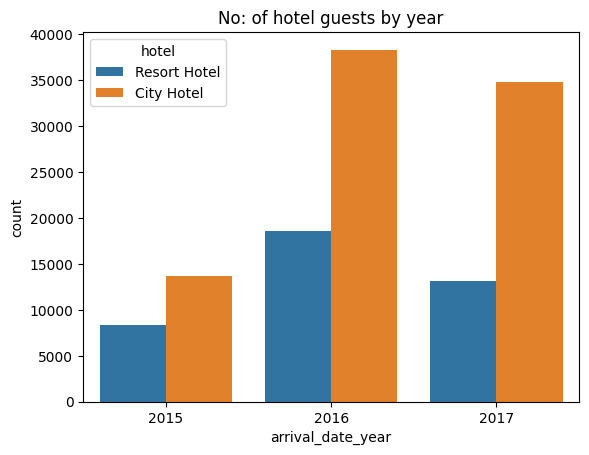

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=hotel_df_pan,x='arrival_date_year', hue= 'hotel')

plt.title('No: of hotel guests by year')

Text(0.5, 1.0, 'Hotel reservation status for year')

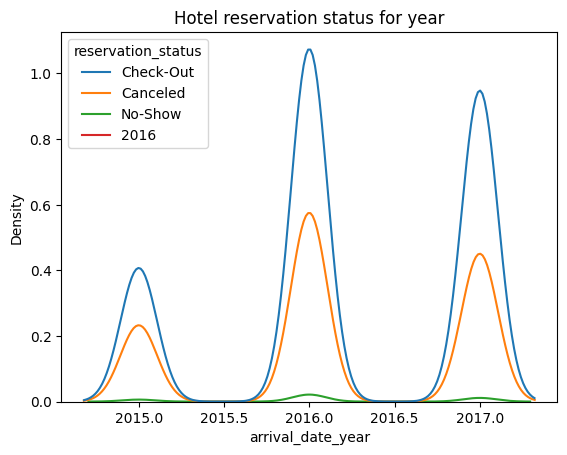

In [ ]:
sns.kdeplot(data=hotel_df_pan,x='arrival_date_year',bw_method=.15,hue='reservation_status')
plt.title('Hotel reservation status for year')

In [ ]:
hotel_df_pan17 = hotel_df_pan[['adr', 'arrival_date_month','hotel']][hotel_df_pan['arrival_date_year'] == 2017]

In [ ]:
hotel_df_pan.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.299657,-0.033667,0.056232,-0.004032,0.001654,0.029104,0.059236,-0.030874,-0.077329,-0.140225,0.058623,-0.183681,-0.183045
lead_time,0.299657,1.000000,0.012834,0.148556,0.005628,0.087734,0.165522,0.120868,-0.020940,-0.121673,-0.000236,0.170265,-0.111574,-0.069725
arrival_date_year,-0.033667,0.012834,1.000000,-0.573232,-0.006070,0.014473,0.019940,0.024235,-0.012847,0.004355,0.032067,-0.062307,-0.020583,0.094076
arrival_date_week_number,0.056232,0.148556,-0.573232,1.000000,0.073920,0.023542,0.024717,0.029569,0.009518,-0.021420,0.002530,0.029834,0.009067,0.006455
arrival_date_day_of_month,-0.004032,0.005628,-0.006070,0.073920,1.000000,-0.014478,-0.027816,-0.003970,-0.001407,-0.005477,0.010359,0.021951,0.009914,0.000352
stays_in_weekend_nights,0.001654,0.087734,0.014473,0.023542,-0.014478,1.000000,0.486839,0.094173,0.018400,-0.086399,0.064709,-0.052130,-0.018939,0.055296
stays_in_week_nights,0.029104,0.165522,0.019940,0.024717,-0.027816,0.486839,1.000000,0.094576,0.020000,-0.096892,0.097148,-0.000913,-0.025172,0.052268
adults,0.059236,0.120868,0.024235,0.029569,-0.003970,0.094173,0.094576,1.000000,0.018431,-0.146663,-0.056419,-0.007793,0.015930,0.097745
babies,-0.030874,-0.020940,-0.012847,0.009518,-0.001407,0.018400,0.020000,0.018431,1.000000,-0.008973,0.084240,-0.010332,0.036930,0.074382
is_repeated_guest,-0.077329,-0.121673,0.004355,-0.021420,-0.005477,-0.086399,-0.096892,-0.146663,-0.008973,1.000000,0.011660,-0.021259,0.075257,0.007932


<Axes: >

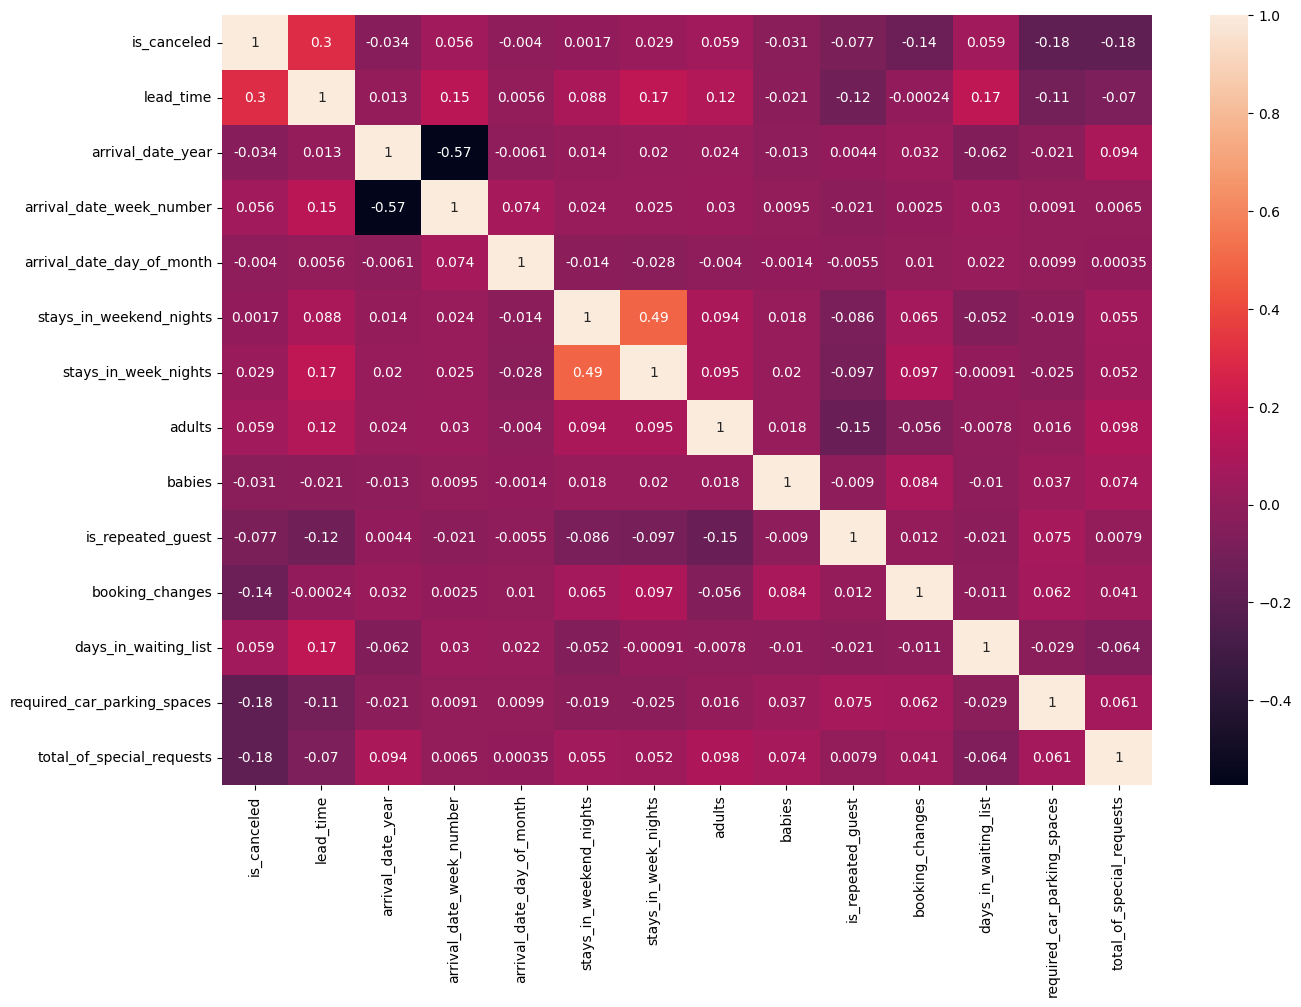

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(hotel_df_pan.corr(), annot=True)

The correlation analysis of the dataset provides insights into the relationships between various features, shedding light on potential patterns and connections that contribute to the prediction of hotel booking cancellations. This analysis serves as a valuable tool for understanding how different factors interplay and influence the likelihood of booking cancellations.

One key observation is that there is a positive correlation between the 'lead_time' and 'is_canceled' variables. This implies that longer lead times between booking and check-in are associated with a higher likelihood of cancellations. This could suggest that guests who book well in advance might be more likely to cancel their reservations, potentially due to changing plans or unforeseen circumstances.

Another noteworthy relationship is the negative correlation between the 'required_car_parking_spaces' and 'is_canceled' variables. This suggests that guests who require car parking spaces are less likely to cancel their bookings. This could be attributed to the fact that guests with specific travel requirements or plans are more committed to their reservations.

Moreover, a negative correlation is observed between the 'total_of_special_requests' and 'is_canceled' variables. This indicates that guests who make more special requests are less likely to cancel their bookings. This could imply that when guests have specific preferences or needs that are accommodated by the hotel, they are more likely to follow through with their reservations.

The correlations between various features provide insights into potential strategies for mitigating booking cancellations. For instance, the hotel could consider implementing flexible cancellation policies for guests with longer lead times or providing additional incentives for guests who make special requests. Additionally, offering convenient parking options could be leveraged to enhance guest commitment to their bookings.


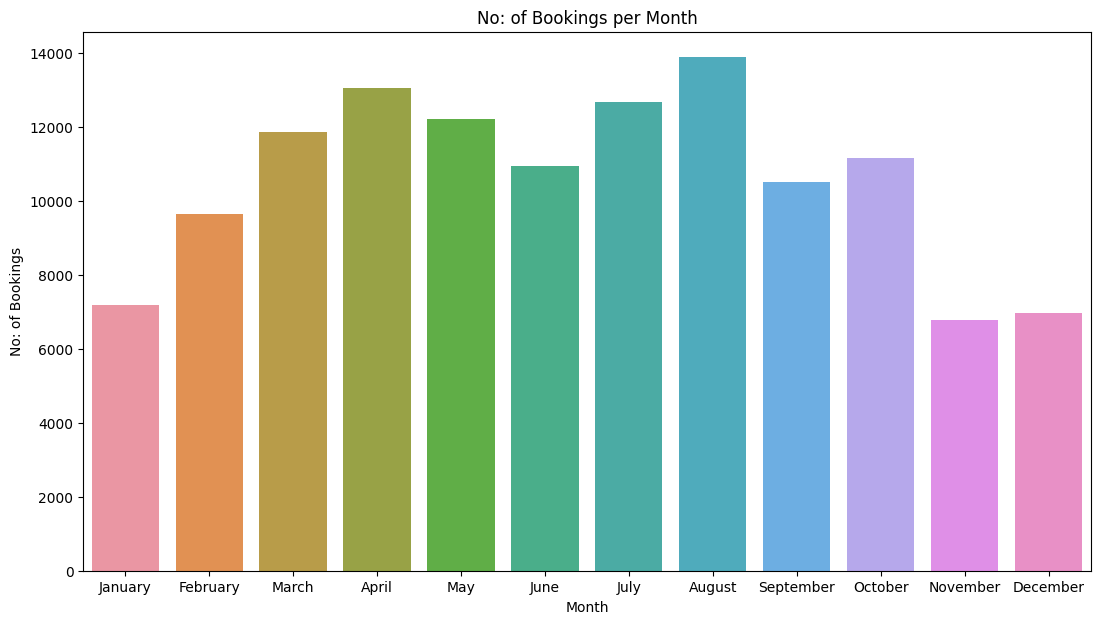

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(13,7))
sns.countplot(x='arrival_date_month', data=hotel_df_pan, order=months)
plt.title('No: of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('No: of Bookings')
plt.show()

Booking volumes exhibit fluctuation throughout the months, where August records the highest number of bookings while January witnesses the lowest booking activity.

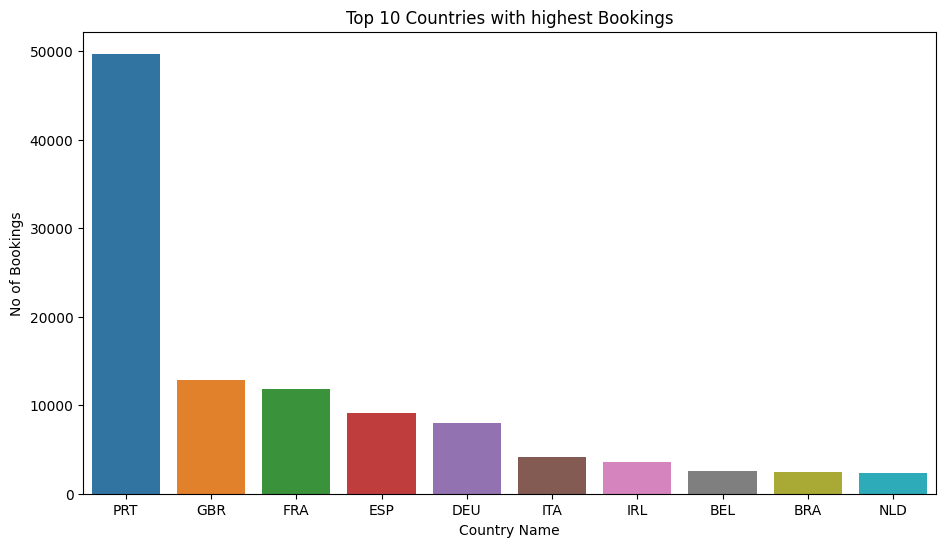

In [ ]:
top_countries = hotel_df_pan['country'].value_counts().head(10)
plt.figure(figsize=(11,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with highest Bookings')
plt.xlabel('Country Name')
plt.ylabel('No of Bookings')
plt.show()

The primary source of bookings comes from Portugal (PRT), leading the list, trailed by Great Britain (GBR), France (FRA), Spain (ESP), and Germany (DEU). Additionally, the top 10 countries include Ireland (IRL), Italy (ITA), Belgium (BEL), Brazil (BRA), and the Netherlands (NLD).

#### Feature Engineering

In [ ]:
hotel_df.show(2)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+---+---------------------------+-------------------------+------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|adr|required_car_parking_spaces|total_of

In [ ]:
# removing unnecessary coolumns
col_list = ['agent', 'company', 'reservation_status_date']
hotel_df = hotel_df.select(*[col for col in hotel_df.columns if col not in col_list])
hotel_df.show(3)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+--------------------+-------------+---+---------------------------+-------------------------+------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|days_in_waiting_list|customer_type|adr|required_car_parking_spaces|total_of_special_requests|reservation_status|
+------------+

In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline

In [ ]:
# Encoding category and string columns
cols = ["hotel", "arrival_date_month", "meal", "country", "market_segment", "distribution_channel", "reserved_room_type",
        "assigned_room_type", "deposit_type","customer_type","reservation_status","previous_cancellations","children",
        "previous_bookings_not_canceled","adr"]
indexing = [StringIndexer(inputCol=col, outputCol=col + "_indexed").fit(hotel_df) for col in cols]
pipeline = Pipeline(stages=indexing)
hotel_df = pipeline.fit(hotel_df).transform(hotel_df)

In [ ]:
hotel_df.show(1)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+--------------------+-------------+---+---------------------------+-------------------------+------------------+-------------+--------------------------+------------+---------------+----------------------+----------------------------+--------------------------+--------------------------+--------------------+---------------------+--------------------------+------------------------------+----------------+--------------------------------------+-----------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_

In [ ]:
features = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children_indexed', 'babies', 'is_repeated_guest',
 'previous_cancellations_indexed', 'booking_changes', 'days_in_waiting_list',
  'required_car_parking_spaces', 'total_of_special_requests', 'hotel_indexed',
 'arrival_date_month_indexed', 'meal_indexed', 'market_segment_indexed',
 'distribution_channel_indexed', 'reserved_room_type_indexed', 'assigned_room_type_indexed',
 'deposit_type_indexed', 'customer_type_indexed', 'reservation_status_indexed']
hotel_df[features].printSchema()

root
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children_indexed: double (nullable = false)
 |-- babies: integer (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations_indexed: double (nullable = false)
 |-- booking_changes: integer (nullable = true)
 |-- days_in_waiting_list: integer (nullable = true)
 |-- required_car_parking_spaces: integer (nullable = true)
 |-- total_of_special_requests: integer (nullable = true)
 |-- hotel_indexed: double (nullable = false)
 |-- arrival_date_month_indexed: double (nullable = false)
 |-- meal_indexed: double (nullable = false)
 |-- market_segment_indexed: double (nullable = false)
 |-- distributi

In [ ]:
hotel_df[features].describe().show()

+-------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------------------+-------------------+--------------------+--------------------+------------------------------+-------------------+--------------------+---------------------------+-------------------------+-------------------+--------------------------+-------------------+----------------------+----------------------------+--------------------------+--------------------------+--------------------+---------------------+--------------------------+
|summary|        lead_time| arrival_date_year|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|            adults|   children_indexed|              babies|   is_repeated_guest|previous_cancellations_indexed|    booking_changes|days_in_waiting_list|required_car_parking_spaces|total_of_special_requests|      hotel_indexed|arrival_date_month_indexed|       meal

In [ ]:
# Create a vector of features
vect_assembler = VectorAssembler(inputCols=features, outputCol="features")
hotel_df = vect_assembler.transform(hotel_df)

In [ ]:
hotel_df.show(1)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+--------------------+-------------+---+---------------------------+-------------------------+------------------+-------------+--------------------------+------------+---------------+----------------------+----------------------------+--------------------------+--------------------------+--------------------+---------------------+--------------------------+------------------------------+----------------+--------------------------------------+-----------+--------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_

<b> Splitting the data

In [ ]:
train_data, test_data = hotel_df.randomSplit([0.7, 0.2], seed=42)

<b> Interpretations</b>


1. **Categorical Column Indexing:**
   The categorical and string columns, such as "hotel," "arrival_date_month," "meal," "country," and others, have been encoded using StringIndexer. Each unique value within these columns is assigned a unique index. This encoding is important as it transforms categorical data into numerical values, which is necessary for machine learning algorithms to process the data effectively.

2. **Pipeline for Encoding:**
   A pipeline is constructed to handle the encoding of the categorical columns. StringIndexer models are created for each specified column, fitting them to the dataset. The pipeline then applies these transformations to the dataset. This process ensures that the encoding is consistent across both the training and testing data, avoiding any inconsistencies in the data processing.

3. **Feature Vector Creation:**
   A vector assembler (VectorAssembler) is employed to combine the selected features into a single vector column named "features." This step is essential for machine learning algorithms that require input features to be in a vector format. The "features" column will contain the indexed categorical columns along with any other numeric features that were included.

4. **Train and Test Data Split:**
   The transformed DataFrame is divided into training and testing datasets using the `randomSplit` function. Around 70% of the data is allocated to the training set, while 20% is allocated to the testing set. The "seed" parameter ensures reproducibility of the split, which is important for consistent evaluation and analysis.



### Modeling


In [ ]:
lr_model = LogisticRegression(labelCol="is_canceled", featuresCol="features")
dt_model = DecisionTreeClassifier(labelCol="is_canceled", featuresCol="features")
gbt_model = GBTClassifier(labelCol="is_canceled", featuresCol="features")
rf_model = RandomForestClassifier(labelCol="is_canceled", featuresCol="features", numTrees=150)

<b> Fitting the model on train data

In [ ]:
lr_fit = lr_model.fit(train_data)
dt_fit = dt_model.fit(train_data)
gbt_fit = gbt_model.fit(train_data)
rf_fit = rf_model.fit(train_data)

<b> Generating predictions

In [ ]:
lr_pred = lr_fit.transform(test_data)
dt_pred = dt_fit.transform(test_data)
gbt_pred = gbt_fit.transform(test_data)
rf_pred = rf_fit.transform(test_data)

<b> Evaluating the model

In [ ]:
# Evaluating the model using accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="is_canceled", predictionCol="prediction", metricName="accuracy")
lr_acc = evaluator.evaluate(lr_pred)
dt_acc = evaluator.evaluate(dt_pred)
gbt_acc = evaluator.evaluate(gbt_pred)
rf_acc = evaluator.evaluate(rf_pred)

<b> Accuracies

In [ ]:
print("Accuracy of Logistic Regression: ", lr_acc)
print("Accuracy of Decision Tree: ", dt_acc)
print("Accuracy of Gradient Boosted Trees: ", gbt_acc)
print("Accuracy of Random Forest: ", rf_acc)

Accuracy of Logistic Regression:  0.9999646443218781
Accuracy of Decision Tree:  0.9999646443218781
Accuracy of Gradient Boosted Trees:  0.9999646443218781
Accuracy of Random Forest:  0.9999646443218781


<b> Confusion matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [ ]:
# Logistic Regression Model
lr_tl = lr_pred.select("is_canceled").rdd.flatMap(lambda x: x).collect()
lr_pl = lr_pred.select("prediction").rdd.flatMap(lambda x: x).collect()
# Decison Tree Model
dt_tl = dt_pred.select("is_canceled").rdd.flatMap(lambda x: x).collect()
dt_pl = dt_pred.select("prediction").rdd.flatMap(lambda x: x).collect()
# GBDT Model
gbt_tl = gbt_pred.select("is_canceled").rdd.flatMap(lambda x: x).collect()
gbt_pl = gbt_pred.select("prediction").rdd.flatMap(lambda x: x).collect()
# Random forest Model
rf_tl = rf_pred.select("is_canceled").rdd.flatMap(lambda x: x).collect()
rf_pl = rf_pred.select("prediction").rdd.flatMap(lambda x: x).collect()


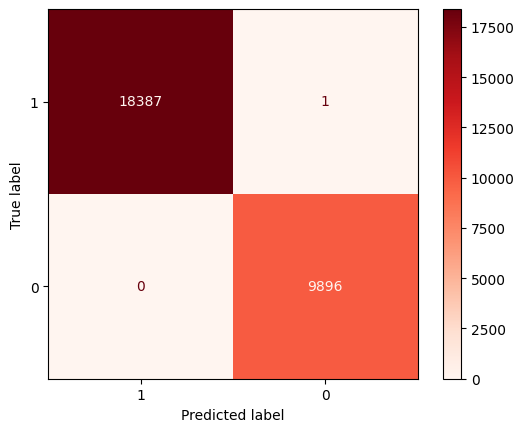

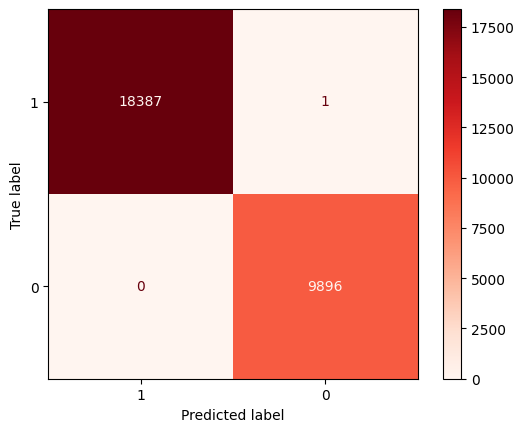

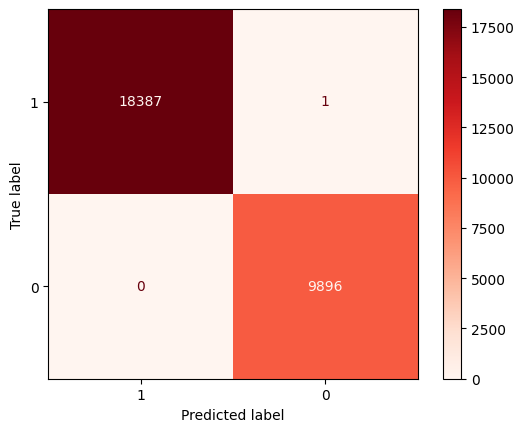

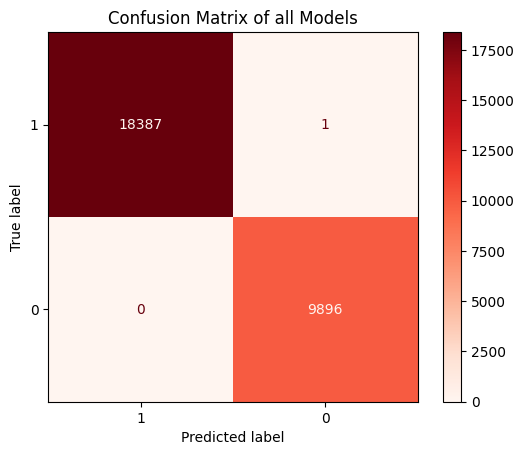

In [ ]:
lr_cm = confusion_matrix(lr_tl, lr_pl)
dt_cm = confusion_matrix(dt_tl, dt_pl)
gbt_cm = confusion_matrix(gbt_tl, gbt_pl)
rf_cm = confusion_matrix(rf_tl, rf_pl)

lr_display = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lr_pred.select("is_canceled").distinct().rdd.flatMap(lambda x: x).collect())
dt_display = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dt_pred.select("is_canceled").distinct().rdd.flatMap(lambda x: x).collect())
gbt_display = ConfusionMatrixDisplay(confusion_matrix=gbt_cm, display_labels=gbt_pred.select("is_canceled").distinct().rdd.flatMap(lambda x: x).collect())
rf_display = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_pred.select("is_canceled").distinct().rdd.flatMap(lambda x: x).collect())

# plotting the confusion matrix
lr_display.plot(cmap=plt.cm.Reds, values_format=".0f")
dt_display.plot(cmap=plt.cm.Reds, values_format=".0f")
gbt_display.plot(cmap=plt.cm.Reds, values_format=".0f")
rf_display.plot(cmap=plt.cm.Reds, values_format=".0f")

plt.title("Confusion Matrix of all Models")
plt.show()


- It can be observed that the models are performing very well and as observed from the confusion matrix, as they have TP and TN values to be really high

<b> Classification Report

In [ ]:
classfication_report_lr = classification_report(lr_tl, lr_pl)
print("Classification Report for Logistic Regression:")
print(classfication_report_lr)
print("##"*30)
classfication_report_dt = classification_report(dt_tl, dt_pl)
print("Classification Report for Decision Tree:")
print(classfication_report_dt)
print("##"*30)
classfication_report_gbt = classification_report(gbt_tl, gbt_pl)
print("Classification Report for Gradient Boosting Tree:")
print(classfication_report_gbt)
print("##"*30)
classfication_report_rf = classification_report(rf_tl, rf_pl)
print("Classification Report for Random Forest:")
print(classfication_report_rf)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18388
           1       1.00      1.00      1.00      9896

    accuracy                           1.00     28284
   macro avg       1.00      1.00      1.00     28284
weighted avg       1.00      1.00      1.00     28284

############################################################
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18388
           1       1.00      1.00      1.00      9896

    accuracy                           1.00     28284
   macro avg       1.00      1.00      1.00     28284
weighted avg       1.00      1.00      1.00     28284

############################################################
Classification Report for Gradient Boosting Tree:
              precision    recall  f1-score   support

           0       1.00      1.

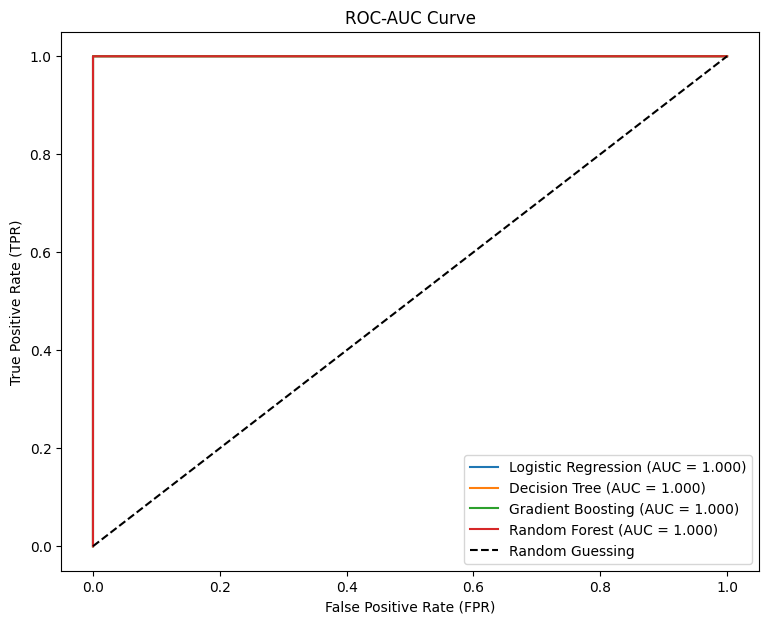

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC-AUC curve
def plot_roc_curve(true_labels, predicted_labels, model_name):
    fpr, tpr, _ = roc_curve(true_labels, predicted_labels)
    auc = roc_auc_score(true_labels, predicted_labels)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})")

# Plotting ROC-AUC curves for all models
plt.figure(figsize=(9, 7))
plot_roc_curve(lr_tl, lr_pl, "Logistic Regression")
plot_roc_curve(dt_tl, dt_pl, "Decision Tree")
plot_roc_curve(gbt_tl, gbt_pl, "Gradient Boosting")
plot_roc_curve(rf_tl, rf_pl, "Random Forest")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()


<b>Tuning the model

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import GBTClassifier

gbt_classifier_tu = GBTClassifier(labelCol="is_canceled", featuresCol="features")

param_grid = ParamGridBuilder() \
    .addGrid(gbt_classifier_tu.maxDepth, [2, 4,6]) \
    .addGrid(gbt_classifier_tu.maxIter, [5,10,15]) \
    .build()

In [ ]:
evaluator_gbt_tu = MulticlassClassificationEvaluator(labelCol="is_canceled", predictionCol="prediction", metricName="accuracy")
cross_val = CrossValidator(estimator=gbt_classifier_tu, estimatorParamMaps=param_grid, evaluator=evaluator_gbt_tu, numFolds=3)
cross_val_model = cross_val.fit(train_data)

predictions_gbt_tu = cross_val_model.transform(test_data)

# Evaluate the tuned GBT model on the scaled test data
accuracy_gbt_tu = evaluator_gbt_tu.evaluate(predictions_gbt_tu)

print("Model accuracy of tuned Gradient Boosting tree: ", accuracy_gbt_tu)


Model accuracy of tuned Gradient Boosting tree:  0.9999646443218781


In [ ]:
true_labels_gbt_tu = predictions_gbt_tu.select("is_canceled").rdd.flatMap(lambda x: x).collect()
predicted_labels_gbt_tu = predictions_gbt_tu.select("prediction").rdd.flatMap(lambda x: x).collect()

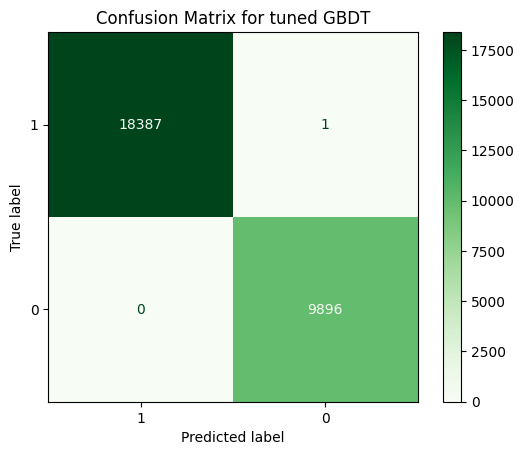

In [ ]:
cm_gbt_tu = confusion_matrix(true_labels_gbt_tu, predicted_labels_gbt_tu)
disp_gbt_tu = ConfusionMatrixDisplay(confusion_matrix=cm_gbt_tu, display_labels=predictions_gbt_tu.select("is_canceled").distinct().rdd.flatMap(lambda x: x).collect())
disp_gbt_tu.plot(cmap=plt.cm.Greens, values_format=".0f")
plt.title("Confusion Matrix for tuned GBDT")
plt.show()

In [ ]:
report_gbt_tu = classification_report(true_labels_gbt_tu, predicted_labels_gbt_tu)
print("Classification Report for Tuned Gradient Boosting Tree:")
print(report_gbt_tu)

Classification Report for Tuned Gradient Boosting Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18388
           1       1.00      1.00      1.00      9896

    accuracy                           1.00     28284
   macro avg       1.00      1.00      1.00     28284
weighted avg       1.00      1.00      1.00     28284





1. **Precision and Recall:**
   Both classes, labeled as 0 and 1, exhibit high precision and recall values, indicating strong performance in correctly classifying instances of both classes. The precision and recall for class 0 are both 1.00, suggesting that all instances classified as class 0 are true positives and none are false positives or false negatives. Similarly, the precision and recall for class 1 are both 1.00, indicating accurate classification for class 1 instances as well.

2. **F1-Score:**
   The F1-score is a harmonic mean of precision and recall and is often used to balance these two metrics. In this report, the F1-scores for both classes are 1.00, reflecting the model's excellent ability to balance precision and recall for both class 0 and class 1 predictions.

3. **Support:**
   The support indicates the actual count of instances in each class within the dataset. For class 0, there are 18,388 instances, while for class 1, there are 9,896 instances.

4. **Accuracy:**
   The overall accuracy of the model is 1.00, meaning that it correctly classifies all instances in the given dataset. This high accuracy suggests that the tuned Gradient Boosting Tree model is performing exceptionally well on this dataset.

5. **Macro and Weighted Averages:**
   Both the macro average and weighted average metrics are also 1.00. The macro average calculates the average of precision, recall, and F1-score across both classes without considering class imbalance. The weighted average accounts for class imbalance by calculating the average with class-specific weights based on support. The fact that these averages are also 1.00 reaffirms the model's strong performance across both classes.



###<b> Ethical and Moral principles



Predicting hotel cancellations brings along important moral and ethical considerations that must guide the project's approach and implementation. These principles aim to ensure fairness, transparency, and responsible use of the predictive model while respecting the rights and well-being of individuals:

1. **Fair Treatment of Guests:**
   It is imperative to treat all guests with fairness and respect, regardless of their likelihood of cancellation. The predictive model should not lead to any form of discrimination or differential treatment based on personal attributes, such as nationality, age, or booking history. The model should prioritize providing equal services to all guests, ensuring a positive and inclusive experience for everyone.

2. **Transparency in Communication:**
   Guests should be informed about the potential utilization of a predictive model for managing reservations. Hotel management should provide clear and transparent communication about how the model works, the factors it considers, and how it might influence booking decisions. This transparency fosters trust and empowers guests to make informed choices.

3. **Protection of Privacy:**
   Privacy of guest data is of utmost importance. The data used to train the predictive model should be collected and stored securely, complying with data protection regulations and industry standards. Personally identifiable information should be anonymized, and sensitive data should be handled with care to prevent unauthorized access or misuse.

4. **Informed Consent:**
   If the predictive model directly influences booking decisions, guests should have the option to opt-out of its consideration when making reservations. This ensures that guests have control over the use of their data and can choose not to be part of the prediction process if they prefer not to.

5. **Avoiding Stigmatization:**
   The model should not stigmatize or label guests based on predictions of cancellations. Such labels could impact the guest's experience and perception of their reservation. Instead, the predictions should serve as internal tools to optimize hotel operations without prejudicing the guest's experience.

6. **Continuous Monitoring and Improvement:**
   Ethical considerations extend beyond the model's initial deployment. Regularly monitor the model's performance to identify any unintended biases or inaccuracies. Continuous improvements should be made to address these issues, ensuring that the model's predictions remain fair and reliable.

7. **Customer Support and Human Intervention:**
   While the model provides valuable insights, it should not replace human judgment entirely. Hotel staff should be available to address guests' concerns, answer questions about reservations, and provide assistance when needed. Human intervention should be available to override model-based decisions, especially in cases where the model might not fully account for exceptional circumstances.

8. **Accountability and Responsibility:**
   Hotel management should take ownership of the predictive model's outcomes and ensure that it aligns with the principles of fairness and ethics. In the event of any discrepancies or negative consequences, the hotel should be willing to take corrective actions and communicate with affected guests.

By adhering to these moral and ethical principles, the hotel can leverage the predictive model for managing cancellations while safeguarding the rights, privacy, and well-being of its guests.